In [0]:
import matplotlib.pyplot as plt #helpful for plotting
import numpy as np
import os, sys

In [0]:
# try to import progressbar
try:
  import progressbar
#if you get this error(ImportError),  install the progressbar and then import it
except ImportError:
  !pip3 install -q progressbar2
  import progressbar
  

In [0]:
from google.colab import files

In [19]:
uploaded = files.upload() #upload your files as uploaded

Saving linear_data.csv to linear_data.csv


In [22]:
# load in the data
data = np.genfromtxt('linear_data.csv', delimiter=',')
print(data.shape)

(1000, 3)


In [23]:
labels = data [:,-1] # take the labels from the data
print (labels.shape)

(1000,)


In [24]:
data = data [:,0:2] # take off the labels from the data for training -data now = every row and column from 0 up to and not including 2
print (data.shape)

(1000, 2)


In [0]:
positive_x = data[labels == 1,0] # get the x coordinates of all data examples with label 1, from first column - aka the x's
positive_y = data[labels == 1,1] # get the y coordinates of all data examples with label 1, from second column - aka the y's
# a == means does ___ = ____ ? so in this case, does the label = 1?

In [0]:
negative_x = data[labels == 0, 0] # get the rows of column 1, aka x's, where label = 0
negative_y = data[labels == 0,1] # get the rows of column 2, aka the y's, where label = 0

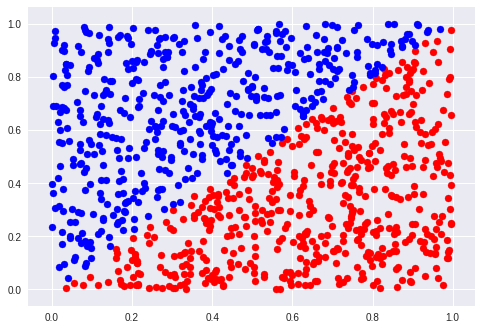

In [27]:
plt.scatter(positive_x, positive_y, c='r') #plot the positive samples given x and y values 
plt.scatter(negative_x, negative_y, c='b') # plot the negative samples given the x and y coordinates 
plt.show()
# in our example, positive samples - label of 1 - means red flower, while negative samples - label of 0- means blue flower


In [0]:
weights = np.random.randn(2, ) * 0.01 # make small random weights

In [29]:
print(weights)

[-0.00811374 -0.02487883]


In [0]:
lr = 0.05 # the learning rate

In [0]:
errors = [] # make an empty list for the errors

In [0]:
for i in range(data.shape[0]): # have i count up to the number of samples in the dataset ie 0-1000, and for each number/ sample
  #do what the intended lines below say 
  
  # forward pass: 
  x = data[i, :] # take out the ith sample --- x is now the sample, so 0, 1, 2, ... 1000
  y = labels[i] # take out the label for the ith sample --- y is now the label
  out = np.dot(x, weights) # get the weighted sum for this example --- sample 0 mul by its weight, plus sample 1 * its weight... ?
  out = np.round(out) #round the output to 1 if it's greater than .5, or to 0 otherwise
  
  # backward pass:
  error = y - out # difference between network's output and actual label 
  errors.append(error) # add new error to  end of list of errors created above^^^
  
  weights += lr * (error * x) # A += means A = A + 
  # update the weights ^

In [34]:
print (weights)

[ 1.32923007 -0.57662083]


In [0]:
# send the whole dataset through the perceptron 
all_out = np.round(np.matmul(data,weights))

In [36]:
correct = (all_out == labels) # compare outputs to labels elementwise 
print (np.mean(correct)) # print the accuracy on the training set

0.821


In [0]:
# get all of the data samples where the perceptron pridicted 0
pred_neg = data[all_out == 0, :]

# get all of the data samples where the perceptron predicted 1
pred_pos = data[all_out == 1, :]

In [0]:
# calculate the difference between each label and its respective ouptut
diff = labels - all_out

# take the samples out of data where the difference is not 0 (the ones it got wrong.)
wrong_pred = data[diff != 0, :]

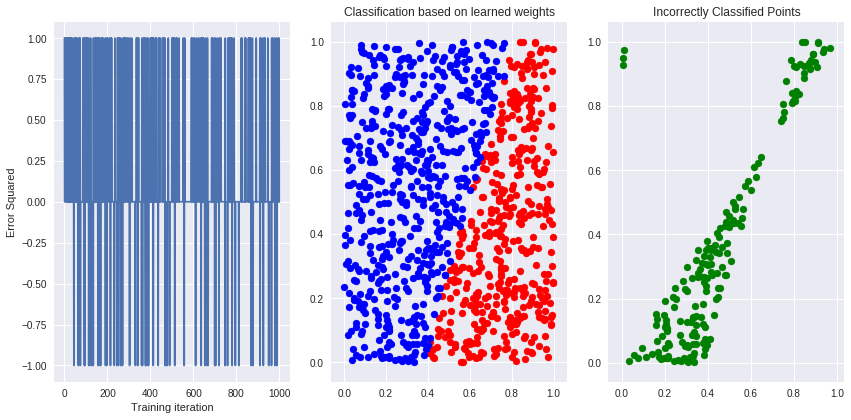

In [39]:
# create a figure
fig = plt.figure(figsize=(12, 6))

# create three subplots within the figure in a row
subplot1 = fig.add_subplot(131)
subplot2 = fig.add_subplot(132)
subplot3 = fig.add_subplot(133)

# set the xlabels and ylabels for subplot 1
subplot1.set_xlabel('Training iteration')
subplot1.set_ylabel('Error Squared')

# tell subplot 1 what it's supposed to show
subplot1.plot(errors)

# set just a title for subplot 2
subplot2.set_title('Classification based on learned weights')

# tell subplot 2 to make a scatter plot where the ones predicted to be
# 1 by the perceptron are colored red and their x and y locations
subplot2.scatter(pred_pos[:, 0], pred_pos[:, 1], c='r')

# tell subplot 2 to also make the negative predictions blue and plot them
# according to their x and y values
subplot2.scatter(pred_neg[:, 0], pred_neg[:, 1], c='b')

# make a title for the third subplot
subplot3.set_title('Incorrectly Classified Points')

# make a scatter plot using the ones it got wrong
subplot3.scatter(wrong_pred[:, 0], wrong_pred[:, 1], c='g')

# use this when there are a lot of subplots/words...sometimes doesn't show right otherwise
plt.tight_layout()
plt.show() # show the plot


The results without the bias are different than the results with the bias. When we had the bias we were able to have 96% accuracy. After removing the bias, the accuracy went down to 82%. The bias acts like the y-intercept of a line, by moving the line up and down, allowing a better fit for the data. Without the bias, the line distinguishing our two classes of flowers will always go through the same place (i.e. (0,0) for a linear function) regardless of the data distribution. Therefore I understand why there is a descrease in accuracy.